# Fourier Basis Vectors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## N-th roots of unity

In [3]:
N = 11
W = np.exp(2.j*np.pi/N)
print(W)

(0.8412535328311812+0.5406408174555976j)


In [4]:
W**11

(1-3.0531133177191805e-16j)

In [5]:
(W**3)

(-0.14231483827328506+0.9898214418809327j)

In [6]:
(W**3)**11

(0.9999999999999994-8.881784197001252e-16j)

In [7]:
def Wvec(N,k):
    W = np.exp(2.j*np.pi/N)
    Wk = []
    for n in range(N):
        Wk.append(W**(n*k))
    return np.array(Wk)

In [8]:
Wk = Wvec(8,2)
print(Wk)

[ 1.+0.j  0.+1.j -1.+0.j -0.-1.j  1.+0.j  0.+1.j -1.+0.j -0.-1.j]


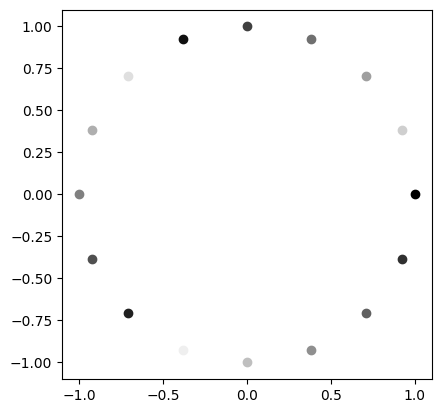

In [9]:
Wk = Wvec(16,5)
for idx in range(len(Wk)):
    plt.plot(np.real(Wk[idx]), np.imag(Wk[idx]), 'o', color=idx/len(Wk)*np.ones(3));
    plt.axis('square');

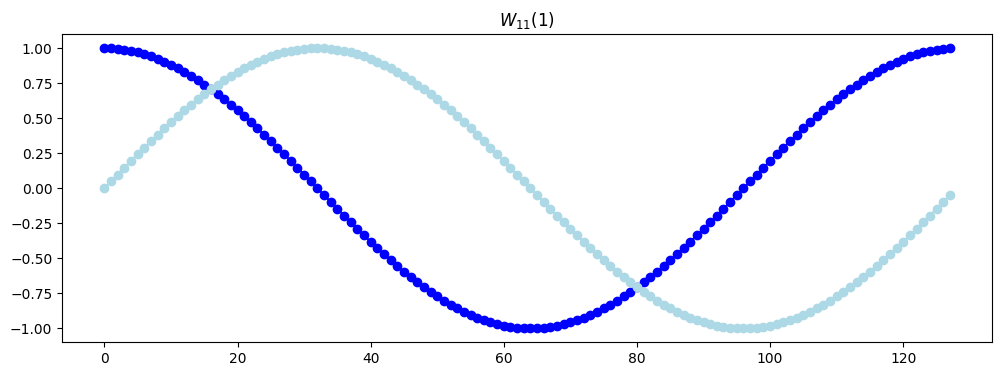

In [10]:
k = 1
Wk = Wvec(128, k)
plt.figure(figsize=(12,4));
plt.plot(np.real(Wk), 'bo-');
plt.plot(np.imag(Wk), 'o-', color='lightblue');
plt.title(r'$W_{'+str(N)+'}('+str(k)+')$');

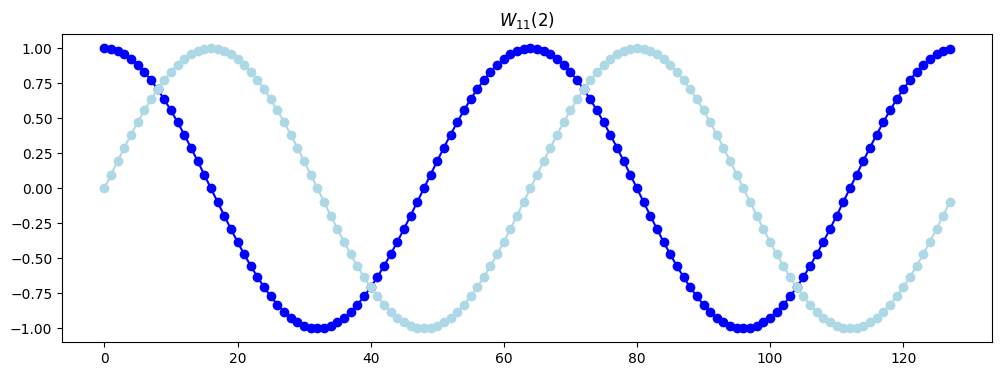

In [11]:
k = 2
Wk = Wvec(128, k)
plt.figure(figsize=(12,4));
plt.plot(np.real(Wk), 'bo-');
plt.plot(np.imag(Wk), 'o-', color='lightblue');
plt.title(r'$W_{'+str(N)+'}('+str(k)+')$');

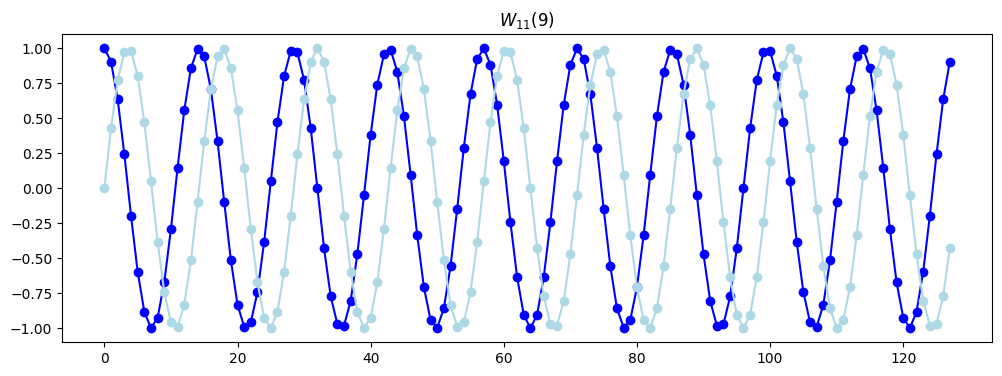

In [12]:
k = 9
Wk = Wvec(128, k)
plt.figure(figsize=(12,4));
plt.plot(np.real(Wk), 'bo-');
plt.plot(np.imag(Wk), 'o-', color='lightblue');
plt.title(r'$W_{'+str(N)+'}('+str(k)+')$');

## Let's try out the orthogonality

In [13]:
# Fourier basis vectors of DIFFERENT frequencies
Wvec(32, 2)@np.conj(Wvec(32,4))

(-1.6317431347220569e-15-8.27052028409408e-15j)

In [14]:
# Fourier basis vectors of the SAME frequencie
Wvec(32, 4)@np.conj(Wvec(32,4))

(31.999999999999897+0j)

# DFT Matrix

In [15]:
def DFTMatrix(N):
    M = []
    for k in range(N):
        M.append(np.conj(Wvec(N,k)))
    return np.array(M)

In [16]:
N = 5
M = DFTMatrix(N)

In [17]:
print( np.round(M, decimals=3) )

[[ 1.   -0.j     1.   -0.j     1.   -0.j     1.   -0.j     1.   -0.j   ]
 [ 1.   -0.j     0.309-0.951j -0.809-0.588j -0.809+0.588j  0.309+0.951j]
 [ 1.   -0.j    -0.809-0.588j  0.309+0.951j  0.309-0.951j -0.809+0.588j]
 [ 1.   -0.j    -0.809+0.588j  0.309-0.951j  0.309+0.951j -0.809-0.588j]
 [ 1.   -0.j     0.309+0.951j -0.809+0.588j -0.809-0.588j  0.309-0.951j]]


## Use the matrix to compute the DFT

In [18]:
# Start with some random signal
f = np.random.rand(N)
print(f)

[0.11098038 0.61437377 0.5398963  0.03458639 0.46089456]


In [19]:
# Multiply by M, thereby computing the DFT
F = M@f
print(F)

[ 1.76073139+0.j         -0.0215097 -0.44298111j -0.58140506+0.39036547j
 -0.58140506-0.39036547j -0.0215097 +0.44298111j]


In [20]:
# Compare to the built-in DFT function
F = np.fft.fft(f)
print(F)

[ 1.76073139+0.j         -0.0215097 -0.44298111j -0.58140506+0.39036547j
 -0.58140506-0.39036547j -0.0215097 +0.44298111j]


## We can compute its inverse

In [ ]:
Minv = np.conj(M) / N

In [ ]:
print(np.round(M@Minv, decimals=1))